# Library Import

In [1]:
# Import libraries

#Data Preparation
import pandas as pd
import numpy as np
import statsmodels.api as sm


#Data Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning model and model analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


#Ignore warnings
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Data Import and Analysis

In [3]:
# Load dataset and view the head

dtf = pd.read_csv('DSA_classifications.csv')
pd.options.display.max_columns = None

dtf.head()

,Unnamed: 0,ISO,Year,Risk.ext.debt.distress,Debt.Indicator,Inflation,Cur.acc.bal,Gen.gov.len.bor,Vol.Exp.Goods,GDP,GDP.per.cap,Gen.gov.rev,US.int.rates,Ext.Debt.Serv,Real.GDP.growth,Exch.Rate,Control.of.Corruption,Government.Effectiveness,Pol.Stability.Absence.of.Violence,Regulatory.Quality,Rule.of.Law,Voice.and.Accountability
0,1,BEN,2005,Moderate,0,4.676,-3.444,-1.523,-1.734,6.571,823.240,12.615,2.981357,48441194.6,1.713165,527.258363,-0.850089,4.342373,0.446816,-0.653912,1.958458,-0.029964
1,2,BFA,2005,Moderate,0,6.409,-10.324,-4.890,18.105,6.150,458.187,15.327,2.981357,45990513.7,8.661873,527.258363,-0.125748,4.421228,-0.064855,-0.401022,1.979971,-0.446520
2,3,BDI,2005,High,1,13.253,-4.665,-10.556,24.653,1.117,148.710,22.587,2.981357,40010353.8,0.900000,1081.577167,-0.930024,3.750419,-1.524742,-1.364591,1.346115,-0.634235
3,4,CMR,2005,Low,0,1.993,-2.757,3.292,-10.677,17.974,1007.390,16.798,2.981357,818876650.0,2.020662,527.258363,-1.181337,4.090441,-0.183143,-0.929635,1.292113,-1.034067
4,5,CAF,2005,In debt distress,1,2.879,-6.235,-4.343,-6.075,1.413,356.688,11.813,2.981357,6878445.1,0.908211,527.258363,-1.278493,3.435491,-1.430053,-1.340983,1.046705,-0.994375


In [4]:
len(dtf)

7500

In [5]:
# Dataframe Info

dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         7500 non-null   int64  
 1   ISO                                7500 non-null   object 
 2   Year                               7500 non-null   int64  
 3   Risk.ext.debt.distress             7500 non-null   object 
 4   Debt.Indicator                     7500 non-null   int64  
 5   Inflation                          7500 non-null   float64
 6   Cur.acc.bal                        7500 non-null   float64
 7   Gen.gov.len.bor                    7500 non-null   float64
 8   Vol.Exp.Goods                      7500 non-null   float64
 9   GDP                                7500 non-null   float64
 10  GDP.per.cap                        7500 non-null   float64
 11  Gen.gov.rev                        7500 non-null   float

In [6]:
# Dataframe Summary Statistics of numerical variables

dtf.describe()

,Unnamed: 0,Year,Debt.Indicator,Inflation,Cur.acc.bal,Gen.gov.len.bor,Vol.Exp.Goods,GDP,GDP.per.cap,Gen.gov.rev,US.int.rates,Ext.Debt.Serv,Real.GDP.growth,Exch.Rate,Control.of.Corruption,Government.Effectiveness,Pol.Stability.Absence.of.Violence,Regulatory.Quality,Rule.of.Law,Voice.and.Accountability
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,3750.500000,2011.976800,0.330800,6.875560,-7.827407,-1.775109,5.833862,14.665868,910.645810,19.070855,2.548998,2.532931e+08,4.866200,977.932333,-0.732677,4.099296,-0.653826,-0.733684,1.715684,-0.569164
std,2165.207842,4.296672,0.470533,7.058395,9.585286,8.020341,15.122724,15.656414,648.614634,10.322607,1.145762,4.105644e+08,4.096275,1552.190485,0.439711,0.447193,0.741672,0.405196,0.454140,0.554905
min,1.000000,2005.000000,0.000000,-7.440000,-65.031000,-19.257000,-31.920000,0.125000,148.710000,7.464000,1.137338,5.911556e+05,-36.391977,0.905209,-1.562845,3.151667,-2.699193,-1.683722,0.683501,-1.708204
25%,1875.750000,2008.000000,0.000000,1.784000,-10.425000,-4.204000,-3.547000,3.163000,492.078000,14.020000,1.469299,3.203228e+07,3.262955,144.055576,-1.078125,3.750486,-1.175840,-1.062580,1.387170,-1.079368
50%,3750.500000,2012.000000,0.000000,5.433000,-6.602000,-2.522500,4.734000,10.118000,722.924000,16.320000,2.409470,9.077098e+07,5.057232,499.605833,-0.721615,4.187854,-0.488365,-0.733571,1.766159,-0.484425
75%,5625.250000,2016.000000,1.000000,9.378000,-3.451000,-0.972000,12.847000,18.966000,1145.880000,21.562000,3.082411,2.839344e+08,6.801517,719.859556,-0.478886,4.414800,-0.062181,-0.414690,2.057864,-0.181714
max,7500.000000,2019.000000,1.000000,46.101000,84.849000,125.135000,114.993000,92.796000,4607.390000,164.054000,5.223406,3.002393e+09,20.715768,9183.875864,0.762483,5.266852,0.660963,0.246492,2.649142,0.597521


In [7]:
# Check for missing values

missing_values = dtf.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Unnamed: 0                           0
ISO                                  0
Year                                 0
Risk.ext.debt.distress               0
Debt.Indicator                       0
Inflation                            0
Cur.acc.bal                          0
Gen.gov.len.bor                      0
Vol.Exp.Goods                        0
GDP                                  0
GDP.per.cap                          0
Gen.gov.rev                          0
US.int.rates                         0
Ext.Debt.Serv                        0
Real.GDP.growth                      0
Exch.Rate                            0
Control.of.Corruption                0
Government.Effectiveness             0
Pol.Stability.Absence.of.Violence    0
Regulatory.Quality                   0
Rule.of.Law                          0
Voice.and.Accountability             0
dtype: int64


In [8]:
# Check for duplicate rows

duplicate_rows = dtf.duplicated().any()
print("Duplicate Rows:\n", duplicate_rows)

dtf[dtf.duplicated() == True]

Duplicate Rows:
 False


,Unnamed: 0,ISO,Year,Risk.ext.debt.distress,Debt.Indicator,Inflation,Cur.acc.bal,Gen.gov.len.bor,Vol.Exp.Goods,GDP,GDP.per.cap,Gen.gov.rev,US.int.rates,Ext.Debt.Serv,Real.GDP.growth,Exch.Rate,Control.of.Corruption,Government.Effectiveness,Pol.Stability.Absence.of.Violence,Regulatory.Quality,Rule.of.Law,Voice.and.Accountability


# Data Visualization

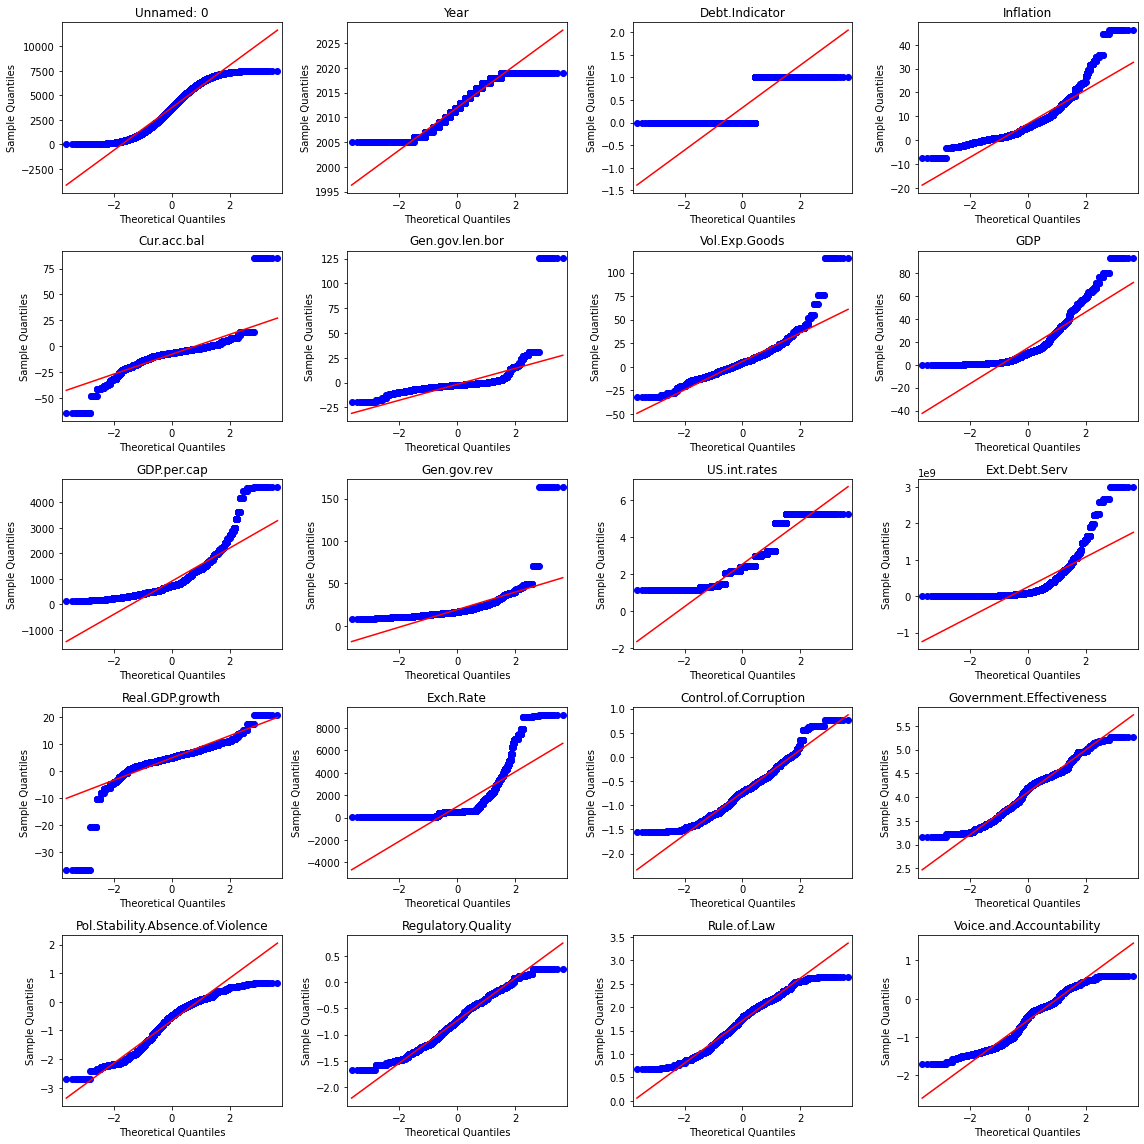

In [9]:
cols = list(dtf.select_dtypes(include='number').columns)


# Create a Q-Q plot for each numerical variable


fig, ax = plt.subplots(round(len(cols)/4), 4, figsize=(16, 16)) 
v = 0;
for col in cols:
    m, n = divmod(v, 4)
    sm.qqplot(dtf[col], line='s', ax=ax[m, n])
    ax[m, n].set_title(col)
    v += 1
plt.tight_layout()
plt.show();

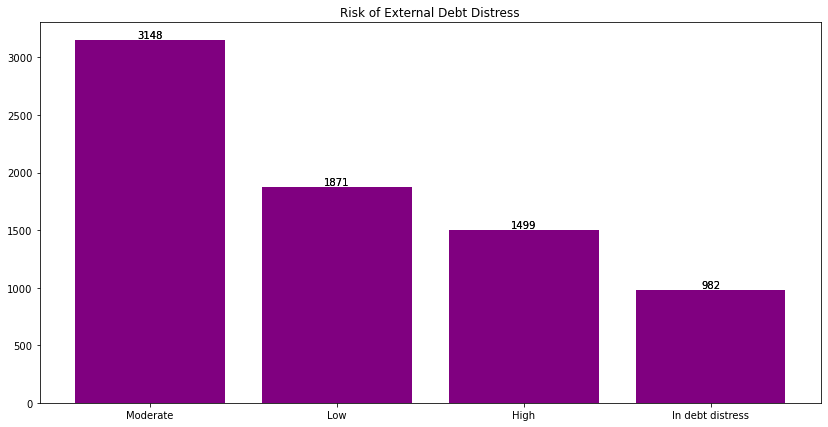

In [10]:
labels = dtf['Risk.ext.debt.distress'].value_counts().index.tolist()
data = dtf['Risk.ext.debt.distress'].value_counts().values.tolist()

fig, ax = plt.subplots(figsize=(14,7))
bars = ax.bar(labels, data, color='purple')
ax.set_title('Risk of External Debt Distress')

ax.bar_label(bars)

for bars in ax.containers:
    ax.bar_label(bars)

In [11]:
dtf['Debt Indicator'] = dtf['Debt.Indicator'].replace({0: 'Low Risk Country', 1: 'High Risk Country'})
dtf['Debt Indicator']

0        Low Risk Country
1        Low Risk Country
2       High Risk Country
3        Low Risk Country
4       High Risk Country
              ...        
7495     Low Risk Country
7496     Low Risk Country
7497     Low Risk Country
7498     Low Risk Country
7499     Low Risk Country
Name: Debt Indicator, Length: 7500, dtype: object

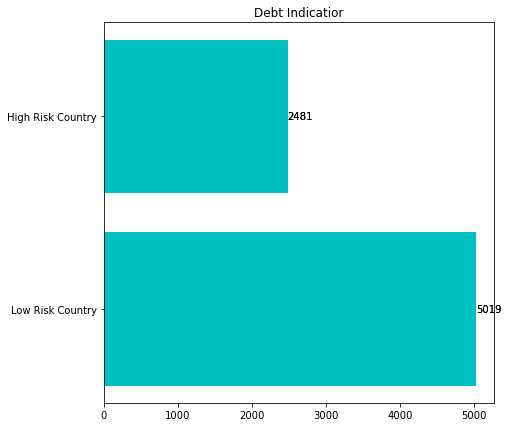

In [12]:
labels = dtf['Debt Indicator'].value_counts().index.tolist()
data = dtf['Debt Indicator'].value_counts().values.tolist()

fig, ax = plt.subplots(figsize=(7,7))
bars = ax.barh(labels, data, color='c')
ax.set_title('Debt Indicatior')

ax.bar_label(bars)

for bars in ax.containers:
    ax.bar_label(bars)

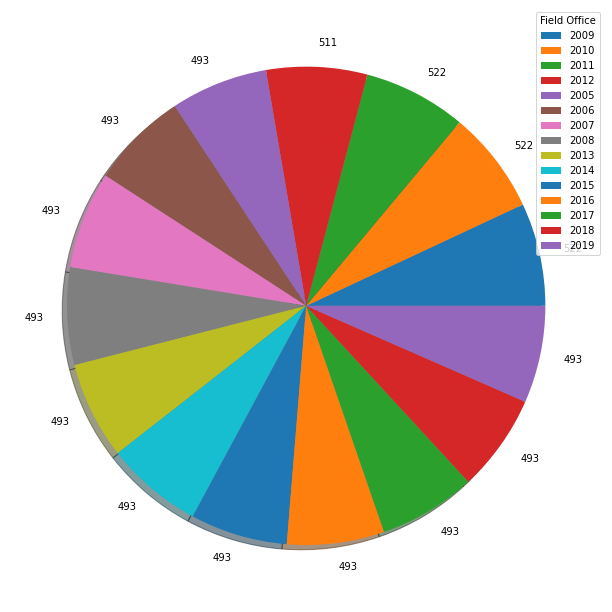

In [13]:
labels = dtf['Year'].value_counts().index.tolist()
data = dtf['Year'].value_counts().values.tolist()

myexplode = [0.05, 0.05, 0.05, 0.05]


fig, ax = plt.subplots(figsize=(11, 11))
plt.pie(data, labels=data,  shadow = True)
plt.legend(labels, title='Field Office')
plt.show()

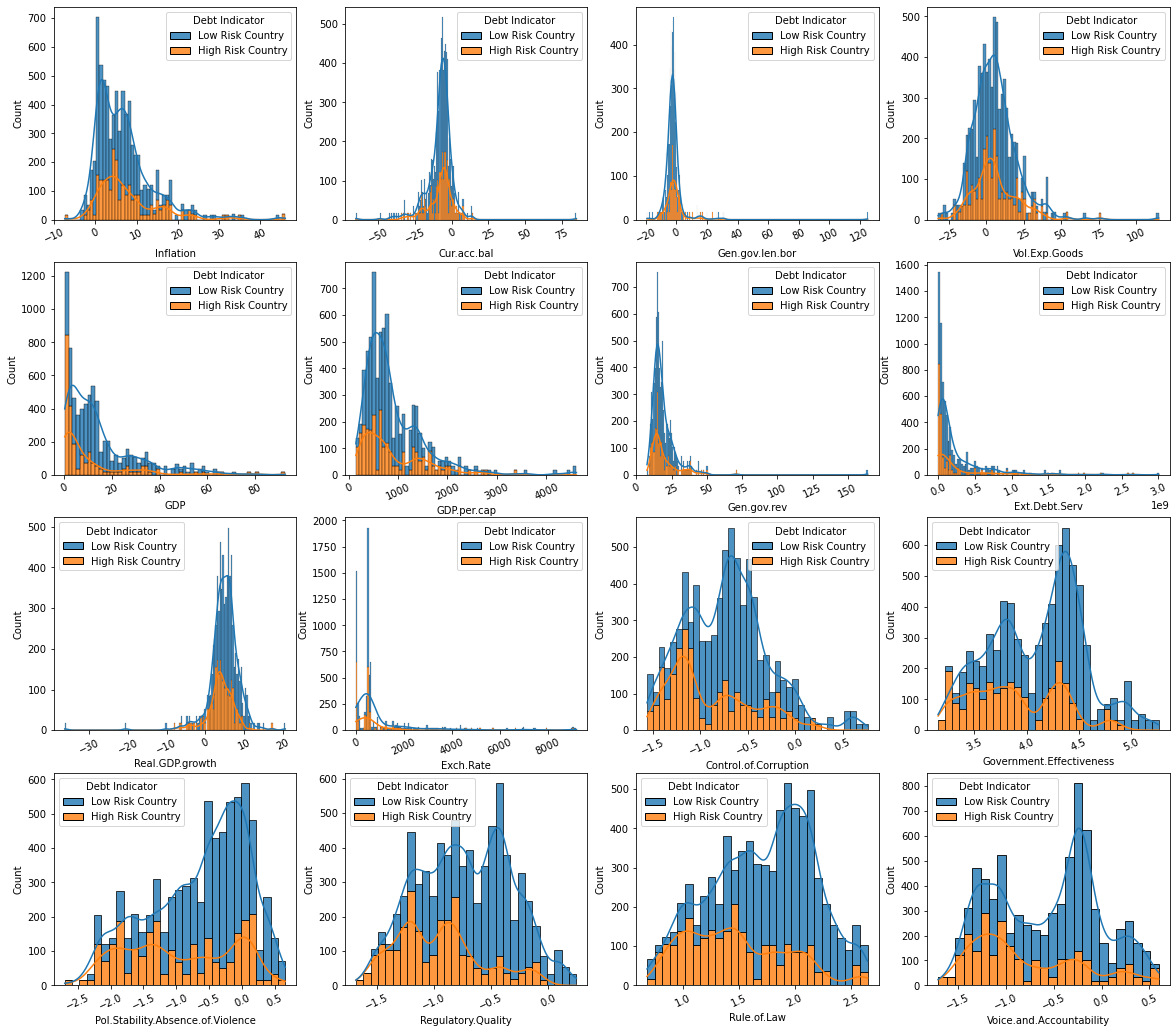

In [14]:
feature = ['Inflation', 'Cur.acc.bal', 'Gen.gov.len.bor', 'Vol.Exp.Goods', 'GDP', 'GDP.per.cap', 'Gen.gov.rev',
           'Ext.Debt.Serv', 'Real.GDP.growth', 'Exch.Rate', 'Control.of.Corruption', 'Government.Effectiveness', 
           'Pol.Stability.Absence.of.Violence', 'Regulatory.Quality', 'Rule.of.Law', 'Voice.and.Accountability']
           


# Drop Potability column
plotter_dataset = dtf.drop('Debt.Indicator', axis=1)

plt.figure(figsize = (20, 18))

# Iterate through the feature list and plot a histlpot
for i in enumerate(feature):
    plt.subplot(4, 4,i[0]+1)

    # Histlot plotting the fetures in the dataset
    sns.histplot(
        data = plotter_dataset, 
        x = plotter_dataset[i[1]], 
        hue = dtf['Debt Indicator'], 
        kde = True, 
        multiple='stack', 
        alpha=0.8
    )

    # Rotate the xticks for better readability
    plt.xticks(rotation = 25)

# Data Cleaning

In [15]:
# Drop all insignificant columns

drop_cols = ['Unnamed: 0', 'ISO', 'Debt Indicator', 'Risk.ext.debt.distress']

dtf = dtf.drop(drop_cols, axis = 1)
dtf.head()

,Year,Debt.Indicator,Inflation,Cur.acc.bal,Gen.gov.len.bor,Vol.Exp.Goods,GDP,GDP.per.cap,Gen.gov.rev,US.int.rates,Ext.Debt.Serv,Real.GDP.growth,Exch.Rate,Control.of.Corruption,Government.Effectiveness,Pol.Stability.Absence.of.Violence,Regulatory.Quality,Rule.of.Law,Voice.and.Accountability
0,2005,0,4.676,-3.444,-1.523,-1.734,6.571,823.240,12.615,2.981357,48441194.6,1.713165,527.258363,-0.850089,4.342373,0.446816,-0.653912,1.958458,-0.029964
1,2005,0,6.409,-10.324,-4.890,18.105,6.150,458.187,15.327,2.981357,45990513.7,8.661873,527.258363,-0.125748,4.421228,-0.064855,-0.401022,1.979971,-0.446520
2,2005,1,13.253,-4.665,-10.556,24.653,1.117,148.710,22.587,2.981357,40010353.8,0.900000,1081.577167,-0.930024,3.750419,-1.524742,-1.364591,1.346115,-0.634235
3,2005,0,1.993,-2.757,3.292,-10.677,17.974,1007.390,16.798,2.981357,818876650.0,2.020662,527.258363,-1.181337,4.090441,-0.183143,-0.929635,1.292113,-1.034067
4,2005,1,2.879,-6.235,-4.343,-6.075,1.413,356.688,11.813,2.981357,6878445.1,0.908211,527.258363,-1.278493,3.435491,-1.430053,-1.340983,1.046705,-0.994375


In [16]:
# Convert categorical values to dummy numerical values
# Encode discrete attributes into individual separate columns so it displays 0 if absent and 1 if present for each column.

dtf = pd.get_dummies(data=dtf, columns=['Year'])
dtf.head()

,Debt.Indicator,Inflation,Cur.acc.bal,Gen.gov.len.bor,Vol.Exp.Goods,GDP,GDP.per.cap,Gen.gov.rev,US.int.rates,Ext.Debt.Serv,Real.GDP.growth,Exch.Rate,Control.of.Corruption,Government.Effectiveness,Pol.Stability.Absence.of.Violence,Regulatory.Quality,Rule.of.Law,Voice.and.Accountability,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019
0,0,4.676,-3.444,-1.523,-1.734,6.571,823.240,12.615,2.981357,48441194.6,1.713165,527.258363,-0.850089,4.342373,0.446816,-0.653912,1.958458,-0.029964,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,6.409,-10.324,-4.890,18.105,6.150,458.187,15.327,2.981357,45990513.7,8.661873,527.258363,-0.125748,4.421228,-0.064855,-0.401022,1.979971,-0.446520,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,13.253,-4.665,-10.556,24.653,1.117,148.710,22.587,2.981357,40010353.8,0.900000,1081.577167,-0.930024,3.750419,-1.524742,-1.364591,1.346115,-0.634235,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.993,-2.757,3.292,-10.677,17.974,1007.390,16.798,2.981357,818876650.0,2.020662,527.258363,-1.181337,4.090441,-0.183143,-0.929635,1.292113,-1.034067,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2.879,-6.235,-4.343,-6.075,1.413,356.688,11.813,2.981357,6878445.1,0.908211,527.258363,-1.278493,3.435491,-1.430053,-1.340983,1.046705,-0.994375,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# Separate features (X) and target variable (y)

X = dtf.drop(columns=['Debt.Indicator'])
y = dtf['Debt.Indicator']

In [18]:
# Standardize the features to have zero mean and unit variance

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Machine Learning Model

In [20]:
# Instantiate the SVM model

svm_model = SVC()

In [21]:
# Fit the model to the training set

svm_model.fit(X_train, y_train)

print('The model has been successfully trained')

The model has been successfully trained


In [22]:
# Model Evaluation: Predict test set using the model

svm_predictions = svm_model.predict(X_test)

In [23]:
# Calculate accuracy

svm_accuracy = accuracy_score(y_test, svm_predictions)

In [24]:
# Print accuracy score of the model

print("Support Vector Machine Accuracy:", svm_accuracy)

Support Vector Machine Accuracy: 0.9933333333333333


In [25]:
# Print classification report 

print("Support Vector Machine Classification Report:\n", classification_report(y_test, svm_predictions))

Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       995
           1       1.00      0.98      0.99       505

    accuracy                           0.99      1500
   macro avg       1.00      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [26]:
# Print confusion matrix for each model

cm = confusion_matrix(y_test, svm_predictions)
print("Support Vector Machine Confusion Matrix:\n", cm)

Support Vector Machine Confusion Matrix:
 [[995   0]
 [ 10 495]]


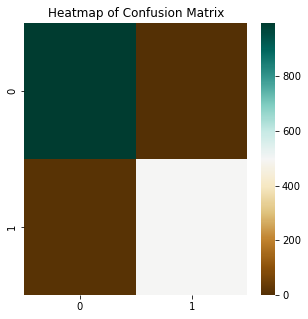

In [27]:
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cm, cmap='BrBG')
plt.title('Heatmap of Confusion Matrix')
plt.show()

In [28]:
y_prob = svm_model.decision_function(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [29]:
# Calculate the AUC (Area Under the Curve) score
auc = roc_auc_score(y_test, y_prob)

auc

0.9999363152395642

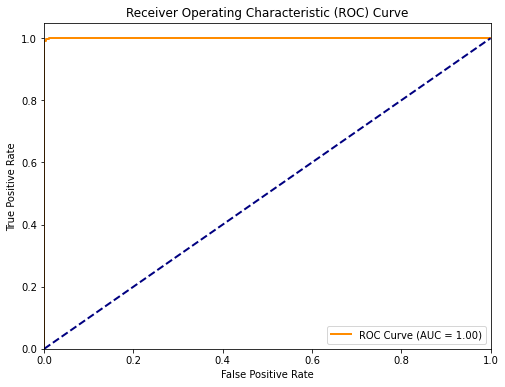

In [30]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()